In [55]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

dataPath = "/content/drive/MyDrive/DM/acm.txt"

authors = set()
venues = set()
publications = set()
citations = set()
index = ""


In [56]:
with open(dataPath, 'r', newline='', encoding="utf8") as dataFile:
  for line in dataFile:
    if line.startswith("#index"):
      index = line[7:]
      publications.add(line)
    elif line.startswith("#@"):
      authorList = line[3:].split(";")
      for author in authorList:
        authors.add(author.strip())
    elif line.startswith("#c"):
      venues.add(line)
    elif line.startswith("#%"):
      #keep each citation associated with the index it originated from. This lets us keep each citation as a unique event, but also lets us correlate it with the paper it came from for when calculating the impact factor. 
      citations.add(index+line) 


print("Total Number of Unique Authors: ", len(authors))
print("Total number of Venues: ", len(venues))
print("Total number of publications:", len(publications))
print("Total number of Citations:", len(citations))


Total Number of Unique Authors:  1662167
Total number of Venues:  273329
Total number of publications: 2385057
Total number of Citations: 9437851


A. Compute the number of distinct authors, publication venues, publications, and citations/references. See above. 

In [57]:
unique_venue_names = set()
with open(dataPath, 'r', newline='', encoding="utf8") as dataFile:
  for line in dataFile:
    index = ""
    venue = ""
    for line in dataFile:
      if line.startswith("#c"): #venue lines
        if "Principles and Practice of Knowledge Discovery in Databases" in line:
          venue = line[3:]#strip the #c
          unique_venue_names.add(venue)

print("Unique Venue Names:")
for venue in unique_venue_names:
  print(venue)


Unique Venue Names:
KDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

KDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

nowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

KDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

nowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)



B) When we look at the venues containing the string ‘Principles and Practice of Knowledge Discovery in Databases’, we notice that the same venue can occur with several names, with each name relating to a year that that venue was utilized. This implies that our data is likely inaccurate in situations where things we would consider to be the same are encoded differently in the dataset. 

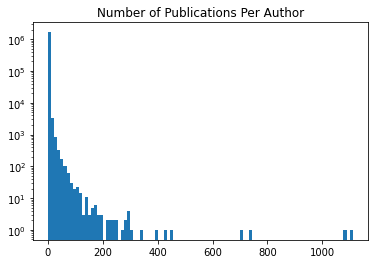

In [58]:
from collections import defaultdict
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


def generate0():
  return 0

num_publications_by_author = defaultdict(generate0) #whenever a key is accessed and a value is not present, that value will be zero.

with open(dataPath, 'r', newline='', encoding="utf8") as dataFile:
  for line in dataFile:
    if line.startswith("#@"):
      authorList = line[3:].split(";")
      for author in authorList:
        num_publications_by_author[author.strip()] += 1

authorNames = list(num_publications_by_author.keys())
authorPublications = list(num_publications_by_author.values())

#make sure that there's no empty author in our list
emptyAuthorIndex = authorNames.index("")
del authorNames[emptyAuthorIndex]
del authorPublications[emptyAuthorIndex]

plt.title('Number of Publications Per Author')
plt.hist(authorPublications, bins=100,log=True)
plt.show()

In [59]:
import numpy as np

mean = np.mean(authorPublications) #average of how many papers each author wrote
standardDeviation = np.std(authorPublications) #standard deviations of  number of papers written by each author
minV = np.min(authorPublications)
q1 = np.percentile(authorPublications,25) #median of the lower half of the authors
median = np.median(authorPublications)
q3 = np.percentile(authorPublications, 75)
maxV = np.max(authorPublications)

print("Mean: ", mean)
print("Standard Deviation: ", standardDeviation)
print("Min: ", minV)
print("q1: ", q1)
print("Median: ", median)
print("q3: ", q3)
print("Max: ", maxV)



Mean:  1.343925335977273
Standard Deviation:  2.590152672721417
Min:  1
q1:  1.0
Median:  1.0
q3:  1.0
Max:  1111


The mean is much bigger than the median, and the standard deviation is much bigger than we would expect considering the quartile values. We can assume and see that there are some significatnt outliers at the top of the list. 

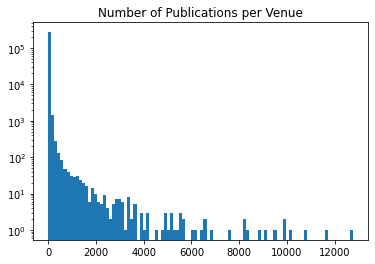

In [60]:
from collections import defaultdict
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


def generate0():
  return 0

number_of_publications_per_venue = {}

with open(dataPath, 'r', newline='', encoding="utf8") as dataFile:
  for line in dataFile:
    if line.startswith("#c"):
      venue = line[2:].strip()
      if number_of_publications_per_venue.get(venue) == None:
        number_of_publications_per_venue[venue] = 1
      else:
        number_of_publications_per_venue[venue] +=1

venueNames = list(number_of_publications_per_venue.keys())
venuePublications = list(number_of_publications_per_venue.values())

plt.hist(venuePublications, bins = 100, log=True)
plt.title("Number of Publications per Venue")
plt.show()


In [61]:
maxIndex = venuePublications.index(np.max(venuePublications))
venueName = venueNames[maxIndex]
print("Venue with the most publications: ", venueName)

Venue with the most publications:  IEEE Transactions on Information Theory


In [62]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
plt=reload(plt)

nref = {}
pubs = {}
cite = {}
citevc = {}
citev = {}

currentIndex = 0
dataPath = "/content/drive/MyDrive/DM/acm.txt"
with open(dataPath, 'r', newline='', encoding="utf8") as dataFile:
  for line in dataFile:
    if line.startswith("#index"):
        indexStr = line[6:].strip()
        currentIndex = int(indexStr) #the index of the paper we are currently processing.
    elif line.startswith("#c"):
        venue = line[2:].strip()
        if pubs.get(currentIndex) == None:
          pubs[currentIndex] = venue


with open(dataPath, 'r', newline='', encoding="utf8") as dataFile:
  for line in dataFile:
    if line.startswith("#index"):
      indexStr = line[6:].strip()
      currentIndex = int(indexStr) #the index of the paper we are currently processing.
    elif line.startswith("#c"):
      venue = line[2:].strip()
      if pubs.get(currentIndex) == None:
        pubs[currentIndex] = venue
    elif line.startswith("#%"): #this line is a citation FROM a paper with the current index TO some other paper of a different index.
      if nref.get(currentIndex) == None:
        nref[currentIndex] = 1 #increment the number of references the current paper has
      else :
        nref[currentIndex] += 1

      citationID = int(line[2:].strip())
      if cite.get(citationID) == None:
        cite[citationID] = 1 #increment the number of times this citation has been cited. 
      else:
        cite[citationID] += 1

      venueOfCitation = pubs.get(citationID) #find the venue that is responsible for this publication
      if citevc.get(venueOfCitation) == None:
        citevc[venueOfCitation] = 1 #increment the number of times that venue has been cited. 
      else:
        citevc[venueOfCitation] += 1


publicationNames = list(nref.keys())
numberOfReferences = list(nref.values())
maxReferenceIndex = numberOfReferences.index(np.max(numberOfReferences))
print("Publication with the most references: ", publicationNames[maxReferenceIndex])
print("Number of References: ", np.max(numberOfReferences))

publicationNames = list(cite.keys())
numberOfCitations = list(cite.values())
maxCitationIndex = numberOfCitations.index(np.max(numberOfCitations))
print("Publication with the most citations: ", publicationNames[maxCitationIndex])
print("Number of Citations: ", np.max(numberOfCitations))


Publication with the most references:  2015217
Number of References:  809
Publication with the most citations:  2135000
Number of Citations:  938039


These numbers make sense. A single paper can only cite so many other papers, but a paper can be cited by any number of other papers. 

(array([1.021643e+06, 1.701000e+04, 1.126000e+03, 3.090000e+02,
        1.200000e+02, 5.300000e+01, 2.000000e+01, 1.700000e+01,
        1.100000e+01, 4.000000e+00, 2.000000e+00, 2.000000e+00,
        2.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        3.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00]),
 array([  1.  ,  33.32,  65.64,  97.96, 130.28, 162.6 , 194.92, 227.24,
        259.56, 291.88, 324.2 , 356.52, 388.84, 421.16, 453.48, 485.8 ,
        518.12, 550.44, 582.76, 615.08, 647.4 , 679.72, 712.04, 744.36,
        776.68, 809.  ]),
 <a list of 25 Patch objects>)

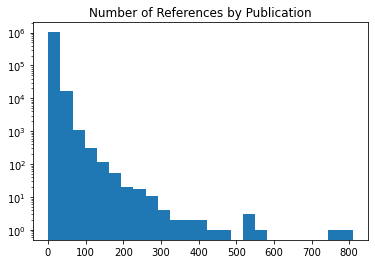

In [63]:
plt.title("Number of References by Publication")
plt.hist(list(nref.values()), bins=25, log=True)

(array([9.4902e+04, 6.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000000e+00, 3.9417560e+04, 7.8834120e+04, 1.1825068e+05,
        1.5766724e+05, 1.9708380e+05, 2.3650036e+05, 2.7591692e+05,
        3.1533348e+05, 3.5475004e+05, 3.9416660e+05, 4.3358316e+05,
        4.7299972e+05, 5.1241628e+05, 5.5183284e+05, 5.9124940e+05,
        6.3066596e+05, 6.7008252e+05, 7.0949908e+05, 7.4891564e+05,
        7.8833220e+05, 8.2774876e+05, 8.6716532e+05, 9.0658188e+05,
        9.4599844e+05, 9.8541500e+05]),
 <a list of 25 Patch objects>)

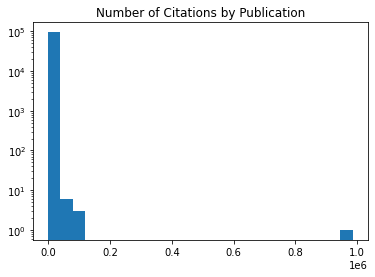

In [64]:
plt.title("Number of Citations by Publication")
plt.hist(list(citevc.values()), bins=25, log=True)

In [65]:
impact_by_venue = {}
venues = list(citevc.keys())
for venue in venues:
  impact_by_venue[venue] = 0
  if venue and number_of_publications_per_venue.get(venue):
    impact_by_venue[venue] = citevc[venue]/number_of_publications_per_venue[venue]


(array([9.4152e+04, 4.7000e+02, 1.4300e+02, 5.2000e+01, 1.9000e+01,
        2.1000e+01, 1.3000e+01, 9.0000e+00, 7.0000e+00, 5.0000e+00,
        0.0000e+00, 6.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  172.4,  344.8,  517.2,  689.6,  862. , 1034.4, 1206.8,
        1379.2, 1551.6, 1724. , 1896.4, 2068.8, 2241.2, 2413.6, 2586. ,
        2758.4, 2930.8, 3103.2, 3275.6, 3448. , 3620.4, 3792.8, 3965.2,
        4137.6, 4310. , 4482.4, 4654.8, 4827.2, 4999.6, 5172. , 5344.4,
        5516.8, 5689.2, 5861.6

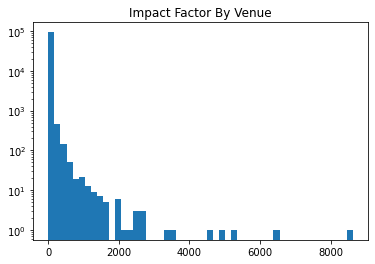

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
plt=reload(plt)

plt.title("Impact Factor By Venue")
plt.hist(list(impact_by_venue.values()), bins=50, log=True)

In [67]:
venues = list(impact_by_venue.keys())
impacts = list(impact_by_venue.values())

indexOfMaxVenue = impacts.index(np.max(impacts))
venueName = venues[indexOfMaxVenue]
print(venueName, " has the biggest impact factor, with a value of", impacts[indexOfMaxVenue])


Challenge of Microprocessors  has the biggest impact factor, with a value of 8620.0


This impact factor is way too large to be reasonable. We know there's something fishy happening with the way venues are named, so this value can't be trusted. 

In [68]:
impact_by_venue = {}
venues = list(citevc.keys())

for venue in venues:
  impact_by_venue[venue] = 0
  if venue != None and number_of_publications_per_venue.get(venue) != None and number_of_publications_per_venue[venue] > 10:
    impact_by_venue[venue] = citevc[venue]/number_of_publications_per_venue[venue]

(array([9.3723e+04, 8.4100e+02, 2.1100e+02, 7.3000e+01, 3.3000e+01,
        1.3000e+01, 3.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.        ,  16.31564356,  32.63128713,  48.94693069,
         65.26257426,  81.57821782,  97.89386139, 114.20950495,
        130.52514851, 146.84079208, 163.15643564, 179.47207921,
        195.78772277, 212.10336634, 228.4190099 , 244.73465347,
        261.05029703, 277.36594059, 293.68158416, 309.99722772,
        326.31287129, 342.62851485, 358.94415842, 375.25980198,
        391.57544554, 407.89108911]),
 <a list of 25 Patch objects>)

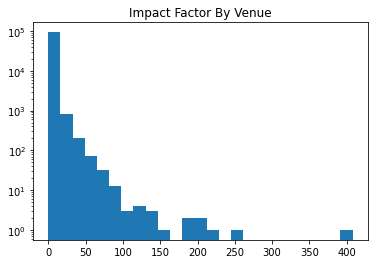

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
plt=reload(plt)

plt.title("Impact Factor By Venue")
plt.hist(list(impact_by_venue.values()), bins=25, log=True)

When we limit the impact factor calculation to only venues what have at least 10 or more publications, the impact factors get slightly more reasonable. 

In [72]:
year_data = {}
with open(dataPath, 'r', newline='', encoding="utf8") as dataFile:
  currYear = 0
  currIndex = 0
  for line in dataFile:
    if line.startswith("#index"):
      indexStr = line[6:].strip()
      currIndex = int(indexStr)
    elif line.startswith("#t"):
      yearStr = line[2:].strip()
      year = int(yearStr)
      if year_data.get(year) == None: #if we haven't encountered this year before.
        year_data[year] = {"numPublications" : 0, "numCitations" : 0, "numReferences" : 0}
        year_data[year]["numPublications"] +=1
        if cite.get(currIndex) != None:
          year_data[year]["numCitations"] = cite.get(currIndex)
        if nref.get(currIndex) != None:
          year_data[year]["numReferences"] = nref.get(currIndex)

      else:
        year_data[year]["numPublications"] += 1
        if cite.get(currIndex) != None:
          year_data[year]["numCitations"] = cite.get(currIndex)
        if nref.get(currIndex) != None:
          year_data[year]["numReferences"] = nref.get(currIndex)

average_year = {}
for year in year_data.keys():
  average_year[year] = {}
  average_year[year]["citationAverage"] = year_data[year]["numCitations"] / year_data[year]["numPublications"]
  average_year[year]["referenceAverage"] = year_data[year]["numReferences"] / year_data[year]["numPublications"]

import collections
average_year = collections.OrderedDict(sorted(average_year.items()))

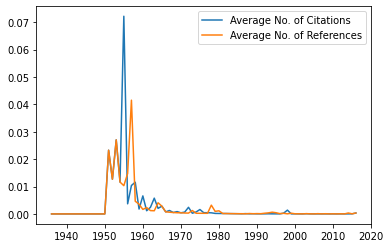

In [73]:
x = list(average_year.keys())
y1 = list([average_year[i]["citationAverage"] for i in x])
y2 = list([average_year[i]["referenceAverage"] for i in x])

fig, ax = plt.subplots()

plt.plot( x, y1, label = "Average No. of Citations")
plt.plot( x, y2,  label = "Average No. of References")
legend = ax.legend(loc='upper right')
plt.show()

Citations and references are roughly correlated with one another, althought this graph looks like the citation/reference count are lower than they should be considering the total number of publications. 